In [2]:
import numpy
from __future__ import division
# Function for evaluating score of the tree
def evaluate_score(clf,X,Y):
    Y_predicted=map(int,(clf.predict(X)).tolist())
    correct_predicts=0
    for i in range(0,len(Y)):
        if Y[i]==Y_predicted[i]:
            correct_predicts=correct_predicts+1
    acc=(correct_predicts/len(X))*100
    return acc

In [3]:
def normalize(mat):
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            mat[i][j]=mat[i][j]/255
    return mat

In [8]:
# Loading the file
X=[]
Y=[]
input_file=open("skin_data.csv","r")
for line in input_file:
    attrs=line.split(",")
    Y.append(int(attrs[-1].strip())-1)
    X.append(map(int,attrs[0:3]))
print "Number of samples loaded:"+str(len(X))
# X=normalize(X)
from random import randint
train_ratio=0.75
train_samples=int(train_ratio*len(X))
X_train=[]
Y_train=[]
while len(X_train)<train_samples:
    index=int(randint(0,len(X)-1))
    X_train.append(X[index])
    Y_train.append(Y[index])
    del X[index]
    del Y[index]
X_test=X
Y_test=Y
print "Training samples:"+str(len(X_train))
print "Testing samples:"+str(len(X_test))

Number of samples loaded:299629
Training samples:224721
Testing samples:74908


In [9]:
# Decision Tree fitting:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
train_score=evaluate_score(classifier,X_train,Y_train)
print "Accuracy on training set:"+str(train_score)
test_score=evaluate_score(classifier,X_test,Y_test)
print "Accuracy on test set:"+str(test_score)

Accuracy on training set:98.7597954797
Accuracy on test set:96.557110055


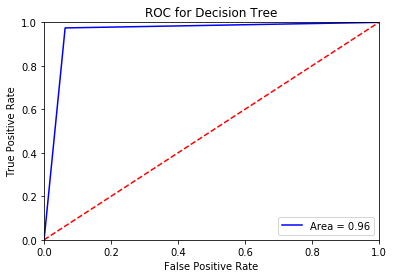

In [20]:
# Plotting the ROC curve and finding the AuC:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
Y_test_preds=map(int,(classifier.predict(X_test)).tolist())
fpr,tpr,_=roc_curve(Y_test,Y_test_preds)
roc_auc = auc(fpr, tpr)
# From here is where the graph is operated. Above this the entire calculation is for finding the False Positive Rate, True Positive Rate and the Area Under Curve
plt.title('ROC for Decision Tree')
lw=2
plt.plot(fpr, tpr, color='blue', label='Area = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()